# 4.10 Task Coding Etiquette & Excel Reporting Part 1

##  This script contains the following points:

####  Q1.  Import latest Instacart merged data from 4.9
####  Q2.  Consider any security implications for this data
####  Q3a.  Create a regional segmentation of the data.  Create a Region column based on the State column.
####  Q3b.  Determine spending habits by region
####  Q4.  Exlude customers with less than 5 orders
####  Q5 and Q6.  Create a profiling variable and create visualization to show distribution of profiles
####  Q7.  Aggregate the Max, Mean, and Min variables on a customer profile level for usage and frequency expenditure
####  Q8.  Compare profiles with regions and departments and identify any links
####  Q9.  Produce suitable charts 
####  Q10.  Export final Instacart data set.

In [1]:
# Import libraries 

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Create path
path = r'/Users/andrewruhnow/Documents/12-2023 Instacart Basket Analysis'

In [3]:
path

'/Users/andrewruhnow/Documents/12-2023 Instacart Basket Analysis'

##  Q1.  Import latest Instacart merged data from 4.9

In [4]:
# Import data from 4.9
df_final_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))

In [5]:
df_final_merged.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,First Name,Last Name,Gender,State,Age,date_joined,dependants,family_status,income,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,both
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,both
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,both
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,both


In [6]:
# Drop _merge column
df_final_merged = df_final_merged.drop(columns = ['_merge'])

In [7]:
df_final_merged.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,frequency_flag,First Name,Last Name,Gender,State,Age,date_joined,dependants,family_status,income
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Frequent_Customer,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Frequent_Customer,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,Frequent_Customer,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Frequent_Customer,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,Frequent_Customer,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620


In [8]:
df_final_merged.shape

(32434212, 33)

##  Q2.  Consider any security implications for this data

The data set includes PII:  First Name, Last Name, Gender, Age, family status, dependants, marital status, and income.

##  Q3a.  Create a regional segmentation of the data.  Create a Region column based on the State column.

In [9]:
# Create a Region column based on wikipedia information

df_final_merged['Region'] = 'West'

df_final_merged.loc[
    df_final_merged['State'].isin(['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']),
    'Region'
] = 'Northeast'

df_final_merged.loc[
    df_final_merged['State'].isin(['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']),
    'Region'
] = 'Midwest'

df_final_merged.loc[
    df_final_merged['State'].isin(['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']),
    'Region'
] = 'South'

In [10]:
df_final_merged.tail()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,First Name,Last Name,Gender,State,Age,date_joined,dependants,family_status,income,Region
32434207,49235,Organic Half & Half,53,16,1.8,2542346,80734,3,3,8,...,Frank,Bowers,Male,Alabama,45,2019-09-28,1,married,41072,South
32434208,49520,Orange Sparkling Water,115,7,7.5,1363278,74506,1,1,14,...,Joe,Coffey,Male,Vermont,44,2018-04-16,3,married,97209,Northeast
32434209,49520,Orange Sparkling Water,115,7,7.5,2008002,74506,2,0,15,...,Joe,Coffey,Male,Vermont,44,2018-04-16,3,married,97209,Northeast
32434210,49520,Orange Sparkling Water,115,7,7.5,1595973,74506,3,1,17,...,Joe,Coffey,Male,Vermont,44,2018-04-16,3,married,97209,Northeast
32434211,49520,Orange Sparkling Water,115,7,7.5,1680478,74506,4,0,16,...,Joe,Coffey,Male,Vermont,44,2018-04-16,3,married,97209,Northeast


In [11]:
# Check frequency
df_final_merged['Region'].value_counts()

Region
South        10801610
West          8300445
Midwest       7603810
Northeast     5728347
Name: count, dtype: int64

Majority of Instacarts customers are in the south region.  Most likely due to the south having 17 states whereas West has 13, Midwest has 12, and Northeast has 9.

##  Q3b.  Determine spending habits by region

In [12]:
# Creating groups
spending_by_region = df_final_merged.groupby('Region')['spender_flag'].value_counts(normalize = True).unstack() * 100

In [13]:
# Assign colors
colors = ['blue', 'lightblue']

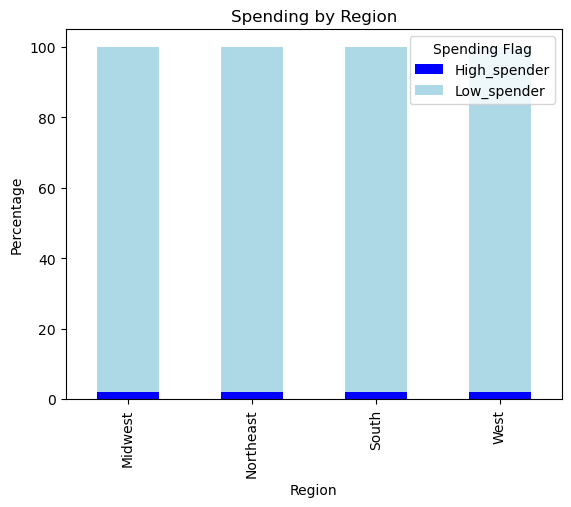

In [14]:
# Plotting bar chart
ax = spending_by_region.plot(kind = 'bar', stacked = True, color = colors)

# Adding title and labels
ax.set_xlabel('Region')
ax.set_ylabel('Percentage')
ax.set_title('Spending by Region')

# Add legend
ax.legend(title = 'Spending Flag', loc = 'upper right')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'spenders_by_region_bar.png'), bbox_inches='tight', pad_inches=0.1)

High and Low spending seems to be the same across each region.

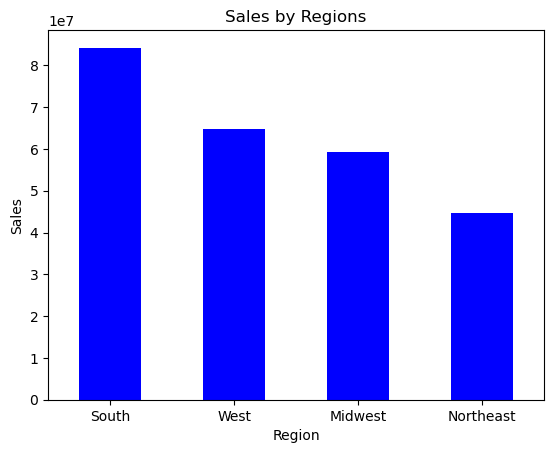

In [15]:
# Create bar chart to show sales by region
bar_sales_region = df_final_merged.groupby('Region')['prices'].sum().sort_values(ascending=False).plot.bar(
    title='Sales by Regions', xlabel='Region', ylabel='Sales', color='blue'
)
plt.xticks(rotation=0)
plt.show()

In [16]:
# Saving bar chart to visualizations folder
bar_sales_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_sales_region.png'))

##  Q4.  Exlude customers with less than 5 orders

In [17]:
# Create exclusion flag
df_final_merged['exclude_flag'] = df_final_merged ['max_order'] < 5

In [18]:
# Excluding low activity customers
df_exclude = df_final_merged[~df_final_merged['exclude_flag']]

In [19]:
df_less_5 = df_final_merged[df_final_merged['exclude_flag']]

In [20]:
df_exclude.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,Last Name,Gender,State,Age,date_joined,dependants,family_status,income,Region,exclude_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,Midwest,False
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,Midwest,False
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,Midwest,False
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,Midwest,False
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,Midwest,False


In [21]:
df_less_5.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'less_than_5_orders_customers.pkl'))

In [22]:
df_less_5.shape

(1441548, 35)

##  Q5 and Q6.  Create a profiling variable and create visualizations to show the distribution of profiles

In [23]:
column_names_list = list(df_final_merged)

In [24]:
print(column_names_list)

['product_id', 'product_name', 'aisle_id', 'department_id', 'prices', 'order_id', 'user_id', 'order_number', 'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order', 'first_order', 'add_to_cart_order', 'reordered', 'price_range_loc', 'busiest_day', 'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average spent', 'spender_flag', 'Customer_orders_frequency', 'frequency_flag', 'First Name', 'Last Name', 'Gender', 'State', 'Age', 'date_joined', 'dependants', 'family_status', 'income', 'Region', 'exclude_flag']


In [25]:
# Creating subset dataframe
column_names_list = ['product_id', 'product_name', 'department_id', 'prices', 
                     'user_id', 'order_number', 'orders_day_of_week', 
                     'order_hour_of_day', 'days_since_prior_order', 
                     'add_to_cart_order', 'price_range_loc', 
                     'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag', 
                     'spender_flag', 'Customer_orders_frequency', 
                     'frequency_flag', 'Gender', 'State', 'Age', 
                     'dependants', 'family_status', 'income', 'Region']

In [26]:
df_ex_sub = df_exclude[column_names_list]

In [27]:
df_ex_sub.shape

(30992664, 25)

In [28]:
df_ex_sub.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'under_5_excluded_subset.pkl'))

In [29]:
# Create sample data 70/30
np.random.seed(4)
dev = np.random.rand(len(df_ex_sub)) <= 0.7

In [30]:
dev

array([False,  True, False, ..., False,  True,  True])

In [31]:
np.random.rand(10)

array([0.02871444, 0.46626758, 0.0329061 , 0.76902872, 0.07895811,
       0.64918159, 0.33868022, 0.66731353, 0.88194924, 0.28910457])

In [32]:
# Splitting dataframe into two samples 'big (70%)' and 'small (30%)'
big = df_ex_sub[dev]
small = df_ex_sub[~dev]

In [33]:
# Export data to pickle
small.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_ex_sub_small_sample.pkl'))

Going forward I will be using 70/30 sample on all analysis and visualizations to prevent memory issues.

In [34]:
small.head()

,product_id,product_name,department_id,prices,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,...,spender_flag,Customer_orders_frequency,frequency_flag,Gender,State,Age,dependants,family_status,income,Region
0,1,Chocolate Sandwich Cookies,19,5.8,138,28,6,11,3.0,5,...,Low_spender,8.0,Frequent_Customer,Male,Minnesota,81,1,married,49620,Midwest
2,907,Premium Sliced Bacon,12,20.0,138,1,5,13,NaN,4,...,Low_spender,8.0,Frequent_Customer,Male,Minnesota,81,1,married,49620,Midwest
3,907,Premium Sliced Bacon,12,20.0,138,10,5,14,6.0,1,...,Low_spender,8.0,Frequent_Customer,Male,Minnesota,81,1,married,49620,Midwest
6,4913,Table Water Crackers,19,4.4,138,23,5,13,24.0,3,...,Low_spender,8.0,Frequent_Customer,Male,Minnesota,81,1,married,49620,Midwest
10,7987,Hazelnut Spread with Cocoa,13,12.8,138,5,0,9,14.0,3,...,Low_spender,8.0,Frequent_Customer,Male,Minnesota,81,1,married,49620,Midwest


In [35]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [36]:
small['income'].describe()

count   9297011.00
mean      99655.40
std       43108.83
min       25903.00
25%       67281.00
50%       96760.00
75%      128081.00
max      593901.00
Name: income, dtype: float64

In [37]:
# Setting income thresholds for low and high income
low_income_threshold = 50000
high_income_threshold = 100000

In [38]:
# Creating a new column income_category based on income column
small['income_category'] = pd.cut(
    small['income'],
    bins=[-float('inf'), low_income_threshold, high_income_threshold, float('inf')],
    labels=['Low Income', 'Middle Income', 'High Income'],
    include_lowest=True)

/var/folders/qg/tbv61t9j3ngdmw6m2qtbk34w0000gn/T/ipykernel_1247/2828148284.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small['income_category'] = pd.cut(


In [39]:
small.head()

,product_id,product_name,department_id,prices,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,...,Customer_orders_frequency,frequency_flag,Gender,State,Age,dependants,family_status,income,Region,income_category
0,1,Chocolate Sandwich Cookies,19,5.80,138,28,6,11,3.00,5,...,8.00,Frequent_Customer,Male,Minnesota,81,1,married,49620,Midwest,Low Income
2,907,Premium Sliced Bacon,12,20.00,138,1,5,13,NaN,4,...,8.00,Frequent_Customer,Male,Minnesota,81,1,married,49620,Midwest,Low Income
3,907,Premium Sliced Bacon,12,20.00,138,10,5,14,6.00,1,...,8.00,Frequent_Customer,Male,Minnesota,81,1,married,49620,Midwest,Low Income
6,4913,Table Water Crackers,19,4.40,138,23,5,13,24.00,3,...,8.00,Frequent_Customer,Male,Minnesota,81,1,married,49620,Midwest,Low Income
10,7987,Hazelnut Spread with Cocoa,13,12.80,138,5,0,9,14.00,3,...,8.00,Frequent_Customer,Male,Minnesota,81,1,married,49620,Midwest,Low Income


Text(0.5, 1.0, 'Income Category Distribution')

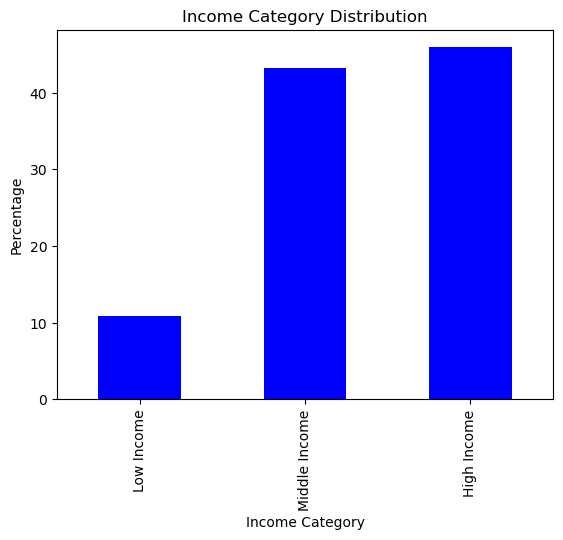

In [40]:
# Plot the percentage distribution of income categories
percentage_distribution = (small['income_category'].value_counts(normalize=True) * 100).sort_index()
percentage_distribution.plot.bar(color=['blue'])
plt.xlabel('Income Category')
plt.ylabel('Percentage')
plt.title('Income Category Distribution')

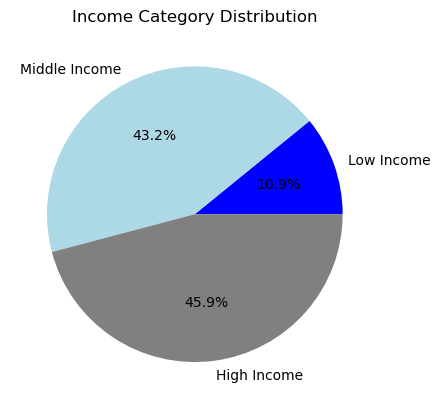

In [41]:
# Create pie chart
income_pie = plt.pie(percentage_distribution, labels=percentage_distribution.index, autopct='%1.1f%%', colors=['blue', 'lightblue', 'grey'])
# Add title to the plot
plt.title('Income Category Distribution')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_income.png'))

In [42]:
# Display the plot
plt.show()

In [43]:
small['Age'].describe()

count   9297011.00
mean         49.47
std          18.48
min          18.00
25%          33.00
50%          49.00
75%          65.00
max          81.00
Name: Age, dtype: float64

In [44]:
# Creating age_group column
def age_label(row):
    if row['Age'] <= 24:
        return 'young-adult'
    elif 24 < row['Age'] <= 44:
        return 'adult'
    elif 44 < row['Age'] < 60:
        return 'middle-age'
    else:
        return 'senior'

In [45]:
small['age_group'] = small.apply(age_label, axis=1)

/var/folders/qg/tbv61t9j3ngdmw6m2qtbk34w0000gn/T/ipykernel_1247/3545808766.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small['age_group'] = small.apply(age_label, axis=1)


In [46]:
small['age_group'].value_counts()

age_group
senior         3175096
adult          2901364
middle-age     2194785
young-adult    1025766
Name: count, dtype: int64

In [47]:
# Calculate the percentage of age groups
percentage_distribution_age = (small['age_group'].value_counts(normalize = True) * 100).sort_index()

In [48]:
# Define colors
colors = ['blue', 'lightblue', 'teal', 'grey']

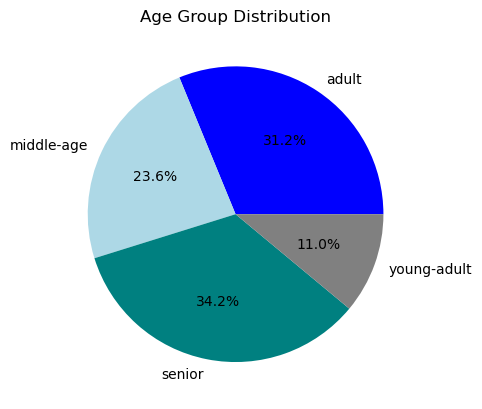

In [49]:
# Create pie chart with specified colors
pie_age_groups = plt.pie(percentage_distribution_age, labels = percentage_distribution_age.index, autopct='%1.1f%%', colors=colors)
plt.title('Age Group Distribution')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_age_group.png'))

(array([0, 1, 2]),
 [Text(0, 0, 'Regular customer'),
  Text(1, 0, 'Loyal customer'),
  Text(2, 0, 'New customer')])

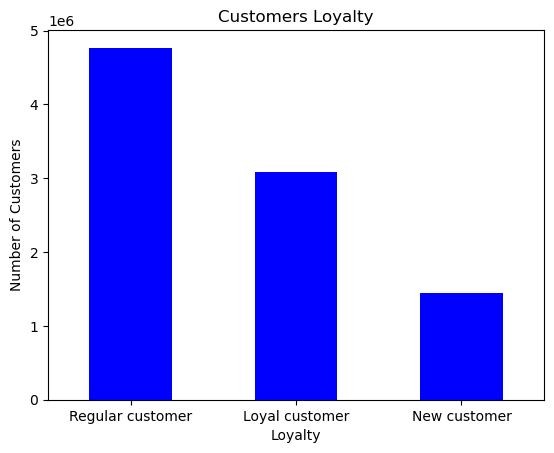

In [50]:
# Creating bar chart showing loyalty customers vs number of orders
bar_orders_loyalty = small['loyalty_flag'].value_counts().plot.bar(title = 'Customers Loyalty', xlabel = 'Loyalty', ylabel = 'Number of Customers', color = 'blue')
plt.xticks(rotation=0)

In [51]:
# Saving bar chart to visualization folder
bar_orders_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_orders.png'))

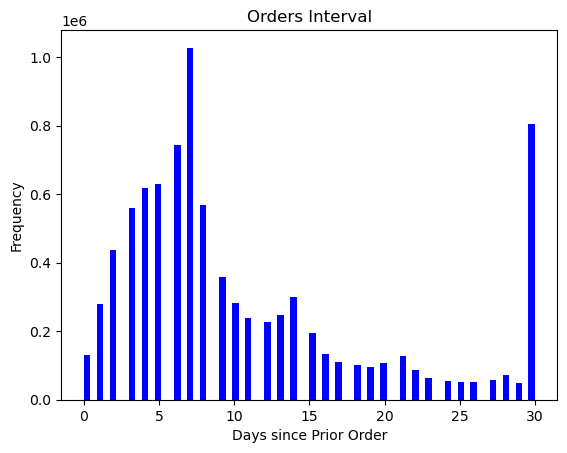

In [52]:
# Create order interval histogram
hist_order_interval = small['days_since_prior_order'].plot.hist(bins = 70, title = 'Orders Interval', xlabel = 'Days since Prior Order', color = 'blue')

In [53]:
# Saving histogram to visualization folder
hist_order_interval.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_interval.png'))

In [54]:
# Creating a dependant flag
small['avg_dependant'] = small.groupby(['user_id'])['dependants'].transform('mean')

/var/folders/qg/tbv61t9j3ngdmw6m2qtbk34w0000gn/T/ipykernel_1247/1389330999.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small['avg_dependant'] = small.groupby(['user_id'])['dependants'].transform('mean')


In [55]:
small.loc[small['avg_dependant'] > 0, 'depend_flag'] = 'with_dependants'

/var/folders/qg/tbv61t9j3ngdmw6m2qtbk34w0000gn/T/ipykernel_1247/720531057.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small.loc[small['avg_dependant'] > 0, 'depend_flag'] = 'with_dependants'


In [56]:
small.loc[small['avg_dependant'] <= 0, 'depend_flag'] = 'without_dependants'

In [57]:
small['depend_flag'].value_counts(dropna = False)

depend_flag
with_dependants       6971828
without_dependants    2325183
Name: count, dtype: int64

In [58]:
# Converting dependant_flag and income_category to a string
small['income_category'] = small['income_category'].astype(str)

/var/folders/qg/tbv61t9j3ngdmw6m2qtbk34w0000gn/T/ipykernel_1247/305155726.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small['income_category'] = small['income_category'].astype(str)


In [59]:
# Creating the customer_profile column
small['customer_profile'] = small['age_group'] + '_' + small['income_category'] + '_' + small['depend_flag']

/var/folders/qg/tbv61t9j3ngdmw6m2qtbk34w0000gn/T/ipykernel_1247/3269174846.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small['customer_profile'] = small['age_group'] + '_' + small['income_category'] + '_' + small['depend_flag']


In [60]:
small.head()

,product_id,product_name,department_id,prices,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,...,Age,dependants,family_status,income,Region,income_category,age_group,avg_dependant,depend_flag,customer_profile
0,1,Chocolate Sandwich Cookies,19,5.80,138,28,6,11,3.00,5,...,81,1,married,49620,Midwest,Low Income,senior,1.00,with_dependants,senior_Low Income_with_dependants
2,907,Premium Sliced Bacon,12,20.00,138,1,5,13,NaN,4,...,81,1,married,49620,Midwest,Low Income,senior,1.00,with_dependants,senior_Low Income_with_dependants
3,907,Premium Sliced Bacon,12,20.00,138,10,5,14,6.00,1,...,81,1,married,49620,Midwest,Low Income,senior,1.00,with_dependants,senior_Low Income_with_dependants
6,4913,Table Water Crackers,19,4.40,138,23,5,13,24.00,3,...,81,1,married,49620,Midwest,Low Income,senior,1.00,with_dependants,senior_Low Income_with_dependants
10,7987,Hazelnut Spread with Cocoa,13,12.80,138,5,0,9,14.00,3,...,81,1,married,49620,Midwest,Low Income,senior,1.00,with_dependants,senior_Low Income_with_dependants


In [61]:
#customer profile and sales 
customer_profile_sales = small.groupby('customer_profile')['prices'].sum()

In [62]:
customer_profile_sales_sorted = customer_profile_sales.sort_values(ascending=False)

In [63]:
colors = plt.cm.Blues(np.linspace(0.8, 0.3, len(customer_profile_sales_sorted)))

In [64]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

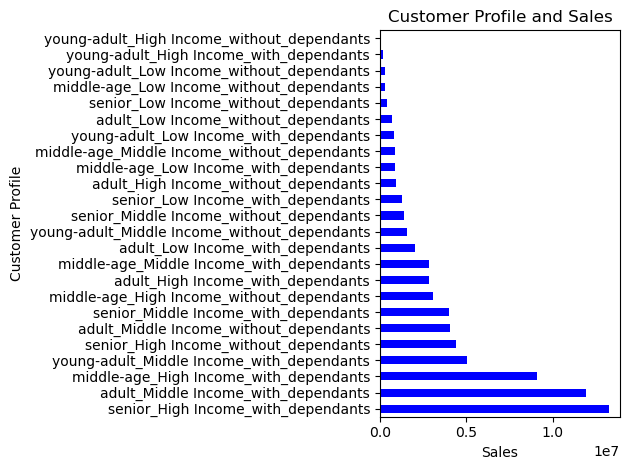

In [65]:
bar_customer_profile = customer_profile_sales_sorted.plot.barh(title = 'Customer Profile and Sales', xlabel = 'Sales', ylabel = 'Customer Profile', color = 'blue')
plt.tight_layout()

In [66]:
# Saving bar graph to visualization folder
bar_customer_profile.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_customer_profile.png'))

In [67]:
# Reordering intervals among customer profiles
customer_profile_orders = small.groupby('customer_profile')['days_since_prior_order'].mean()

In [68]:
customer_profile_sorted = customer_profile_orders.sort_values(ascending=True)

In [69]:
colors = plt.cm.Blues(np.linspace(0.3, 0.8, len(customer_profile_sorted)))

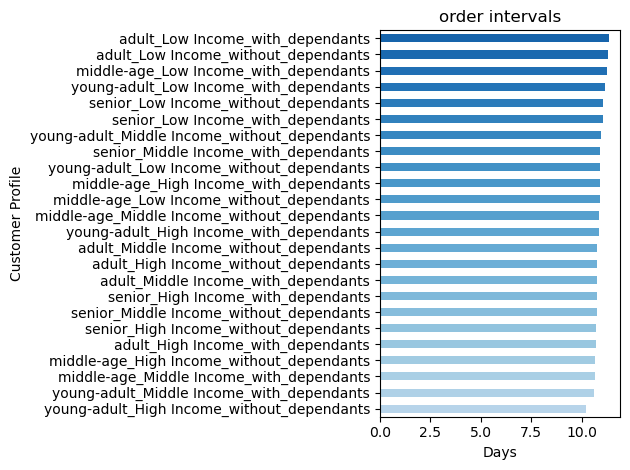

In [70]:
bar_customer_profile_order_intervals = customer_profile_sorted.plot.barh(title = 'order intervals', xlabel = 'Days', ylabel = 'Customer Profile', color = colors)
plt.tight_layout()

In [71]:
# Saving bar graph to visualizations folder
bar_customer_profile_order_intervals.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_customer_profile_order_intervals.png'))

In [72]:
# Group by 'customer_profile' and 'order_hour_of_day' to get the counts
order_hour_day = small.groupby(['customer_profile', 'order_hour_of_day']).size().unstack()

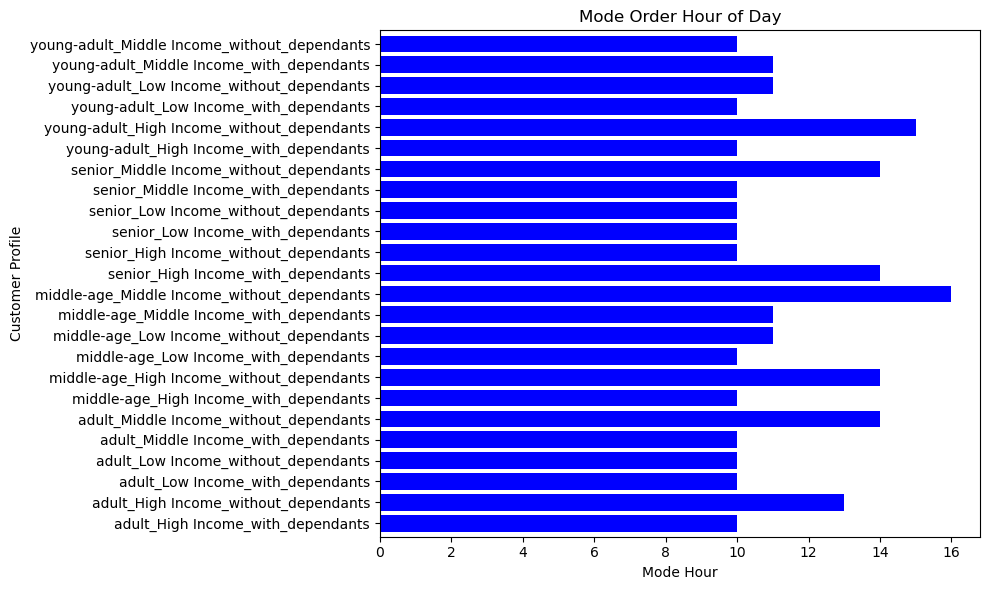

In [73]:
# Calculating mode for each 'customer_profile'
order_hour_day_mode = small.groupby('customer_profile')['order_hour_of_day'].apply(lambda x: x.mode().iloc[0])

# Creating DataFrame for plotting
plot_data = pd.DataFrame({'customer_profile': order_hour_day_mode.index, 'mode_order_hour_of_day': order_hour_day_mode.values})

# Plotting the mode for horizontal bar chart
ax = plot_data.plot(kind='barh', x='customer_profile', y='mode_order_hour_of_day', color='blue', legend=False, title='Mode Order Hour of Day', xlabel='Mode Hour', ylabel='Customer Profile', width=0.8)

# Adjusting the size of the plot
fig = plt.gcf()
fig.set_size_inches(10, 6)  # Set the desired size

# Displaying the plot
plt.tight_layout()
plt.show()

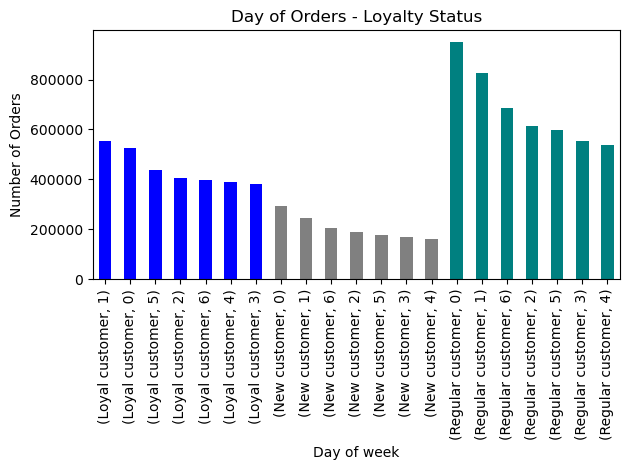

In [74]:
bar_day_loyalty = small.groupby('loyalty_flag')['orders_day_of_week'].value_counts().plot.bar(title = 'Day of Orders - Loyalty Status', xlabel = 'Day of week', ylabel = 'Number of Orders', color=['blue'] * 7 + ['grey'] * 7 + ['teal'] * 7)
plt.tight_layout()

In [75]:
# Saving bar chart to visualization folder
bar_day_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_loyalty_interval.png'))

In [76]:
# Mapping department IDs to department names
department_mapping = {
    1: "frozen",
    2: "other",
    3: "bakery",
    4: "produce",
    5: "alcohol",
    6: "international",
    7: "beverages",
    8: "pets",
    9: "dry goods pasta",
    10: "bulk",
    11: "personal care",
    12: "meat seafood",
    13: "pantry",
    14: "breakfast",
    15: "canned goods",
    16: "dairy eggs",
    17: "household",
    18: "babies",
    19: "snacks",
    20: "deli",
}

In [77]:
# Creating 'department_name' column
small['department_name'] = small['department_id'].map(department_mapping).fillna("missing")

/var/folders/qg/tbv61t9j3ngdmw6m2qtbk34w0000gn/T/ipykernel_1247/484391305.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small['department_name'] = small['department_id'].map(department_mapping).fillna("missing")


In [78]:
small.head()

,product_id,product_name,department_id,prices,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,...,dependants,family_status,income,Region,income_category,age_group,avg_dependant,depend_flag,customer_profile,department_name
0,1,Chocolate Sandwich Cookies,19,5.80,138,28,6,11,3.00,5,...,1,married,49620,Midwest,Low Income,senior,1.00,with_dependants,senior_Low Income_with_dependants,snacks
2,907,Premium Sliced Bacon,12,20.00,138,1,5,13,NaN,4,...,1,married,49620,Midwest,Low Income,senior,1.00,with_dependants,senior_Low Income_with_dependants,meat seafood
3,907,Premium Sliced Bacon,12,20.00,138,10,5,14,6.00,1,...,1,married,49620,Midwest,Low Income,senior,1.00,with_dependants,senior_Low Income_with_dependants,meat seafood
6,4913,Table Water Crackers,19,4.40,138,23,5,13,24.00,3,...,1,married,49620,Midwest,Low Income,senior,1.00,with_dependants,senior_Low Income_with_dependants,snacks
10,7987,Hazelnut Spread with Cocoa,13,12.80,138,5,0,9,14.00,3,...,1,married,49620,Midwest,Low Income,senior,1.00,with_dependants,senior_Low Income_with_dependants,pantry


In [79]:
# Creating new dataframe to group by 'department_name' and 'loyalty_flag'
df_small_grouped = small.groupby(['department_name', 'loyalty_flag']).size().unstack()

In [80]:
df_small_grouped = df_small_grouped.sort_values(by = 'Regular customer', ascending = False)

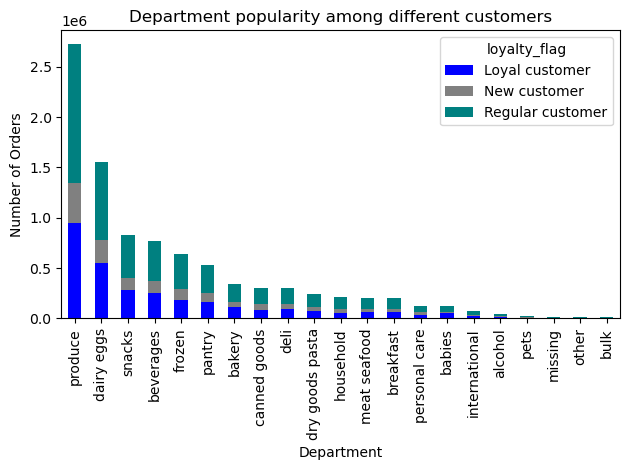

In [81]:
# Plot the data using bar chart
colors = ['blue', 'grey','teal']
bar_dep_grouped = df_small_grouped.plot(kind = 'bar', stacked = True, color = colors)
plt.title('Department popularity among different customers')
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

In [82]:
# Saving bar chart to visualization folder
bar_dep_grouped.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'department-Loyalty.png'))

##  Q7.  Aggregate the Max, Mean, and Min variables on a customer profile level for usage and frequency expenditure

In [83]:
# Grouping by customer_id and calculating max, mean, and min
profile_aggregated = small.groupby('user_id').agg({
    'Age': ['max', 'mean', 'min'],
    'dependants': ['max', 'mean', 'min']
}).reset_index()

In [84]:
# Rename columns for better clarity
profile_aggregated.columns = ['user_id', 
                              'max_age', 'mean_age', 'min_age',
                              'max_dependants', 'mean_dependants', 'min_dependants']

In [85]:
# Displaying aggregated DataFrame
print(profile_aggregated)

        user_id  max_age  mean_age  min_age  max_dependants  mean_dependants  \
0             1       31     31.00       31               3             3.00   
1             2       68     68.00       68               3             3.00   
2             3       33     33.00       33               3             3.00   
3             4       31     31.00       31               3             3.00   
4             7       39     39.00       39               2             2.00   
...         ...      ...       ...      ...             ...              ...   
162537   206203       81     81.00       81               3             3.00   
162538   206206       25     25.00       25               2             2.00   
162539   206207       76     76.00       76               1             1.00   
162540   206208       64     64.00       64               1             1.00   
162541   206209       74     74.00       74               3             3.00   

        min_dependants  
0             

##  Q8.  Compare profiles with regions and departments and identify any links

In [86]:
# Creating dataframe to group data by 'department_name' and 'region'
df_dep_region= small.groupby(['department_name', 'Region']).size().unstack()

In [87]:
df_dep_region = df_dep_region.sort_values(by = 'South', ascending = False)

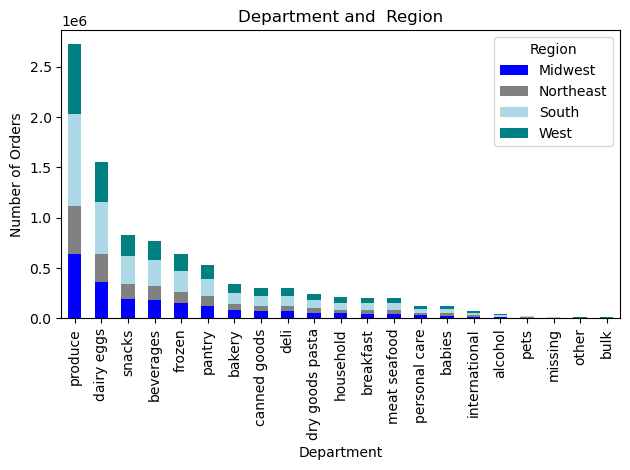

In [88]:
# Plot the data using a bar chart
colors = ['blue', 'grey', 'lightblue', 'teal']
bar_dep_region =df_dep_region.plot(kind = 'bar', stacked = True, color = colors)
plt.title('Department and  Region')
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

In [89]:
# Saving bar chart to visualization folder
bar_dep_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'department-stacked.png'))

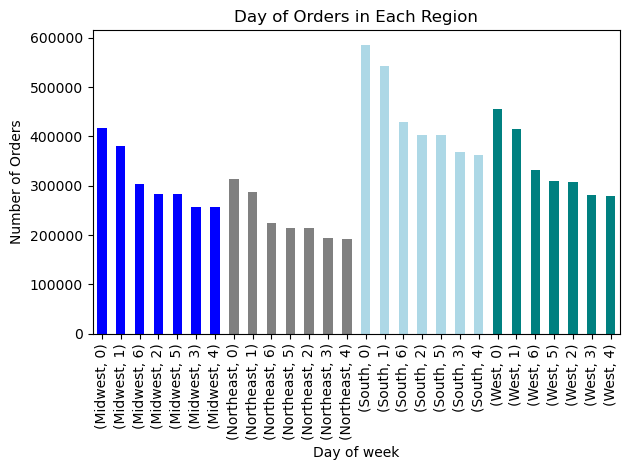

In [90]:
# Displaying differences in order behavior across regions
bar_day_region = small.groupby('Region')['orders_day_of_week'].value_counts().plot.bar(title = 'Day of Orders in Each Region', xlabel = 'Day of week', ylabel = 'Number of Orders',color=['blue'] * 7 + ['grey'] * 7+['lightblue'] * 7 + ['teal'] * 7)
plt.tight_layout()

In [91]:
# Saving bar chart to visualization folder
bar_day_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order_behavior_region.png'))

In [92]:
# Creating bar chart to show department popularity and sales
department_pop = small.groupby('product_name')['order_number'].sum()

In [93]:
department_pop_sort= department_pop.sort_values(ascending=False)

In [94]:
colors = plt.cm.Blues(np.linspace(0.8, 0.3, len(department_pop_sort)))

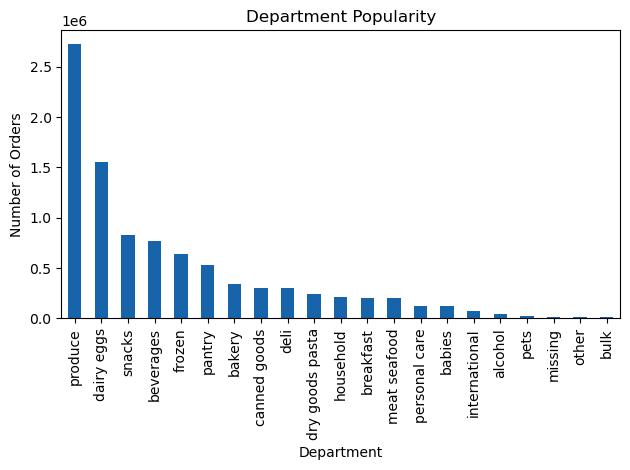

In [95]:
bar_depart_pop = small['department_name'].value_counts(dropna = False).plot.bar(title = 'Department Popularity', xlabel = 'Department', ylabel = 'Number of Orders', color = colors)
plt.tight_layout()

In [96]:
# Saving bar chart to visualizations folder
bar_depart_pop .figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'department-popularity.png'))

##  Q9.  Produce suitable charts 

/var/folders/qg/tbv61t9j3ngdmw6m2qtbk34w0000gn/T/ipykernel_1247/2330294840.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small['department_grouped'] = small['department_name'].where(small['department_name'].isin(top_10_departments))


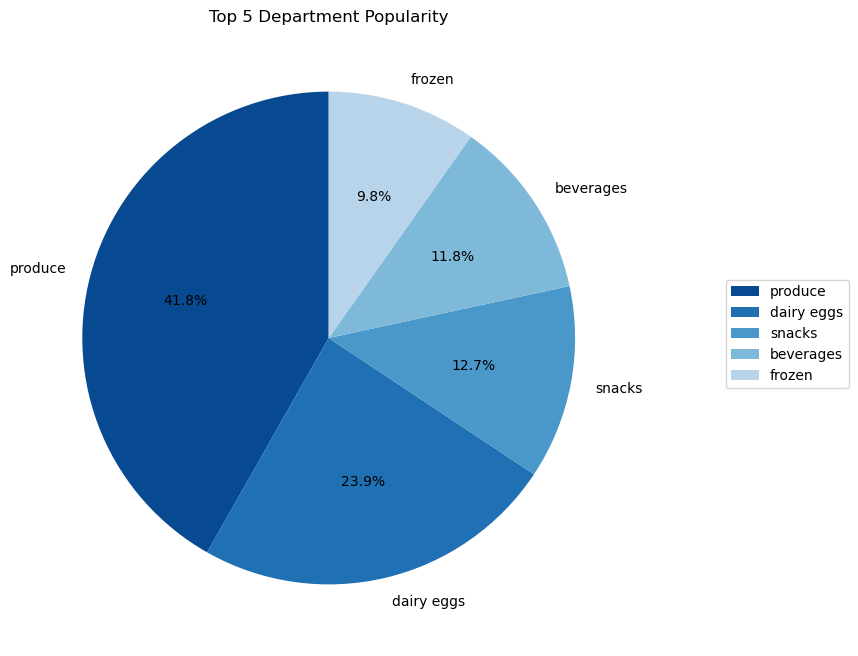

In [97]:
# Calculate counts for each department
department_counts = small['department_name'].value_counts()

# Identify top 10 departments
top_10_departments = department_counts.head(5).index

# Group other departments into "Other"
small['department_grouped'] = small['department_name'].where(small['department_name'].isin(top_10_departments))

# Calculate the percentage of each department group
department_percentage = small['department_grouped'].value_counts(normalize=True) * 100

# Define shades of blue
shades_of_blue = plt.cm.Blues(np.linspace(0.9, 0.3, len(department_percentage)))

# Create a pie chart with shades of blue
fig, ax = plt.subplots(figsize=(8, 8))
pie = ax.pie(department_percentage, labels=department_percentage.index, autopct='%1.1f%%', startangle=90, colors=shades_of_blue)

# Add a legend with shades of blue
ax.legend(pie[0], department_percentage.index, bbox_to_anchor=(1, 0.5), loc="center left", fontsize=10, bbox_transform=plt.gcf().transFigure)

# Set the title
plt.title('Top 5 Department Popularity', )

# Save the figure as an image
save_path = os.path.join(path, '04 Analysis', 'Visualizations', 'top_departments_pie_chart.png')
plt.savefig(save_path)

# Display the pie chart
plt.show()

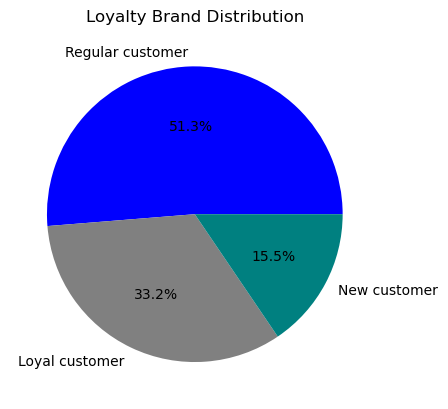

In [98]:
# Create Loyalty brand distribution Pie Chart by calculating the frequency distribution of 'loyalty_flag'
loyalty_distribution = small['loyalty_flag'].value_counts()

# Plot the pie chart
plt.pie(loyalty_distribution, labels=loyalty_distribution.index, autopct='%1.1f%%', colors=['blue', 'grey', 'teal'])
plt.title('Loyalty Brand Distribution')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_loyalty_distribution.png'))

# Display the plot
plt.show()

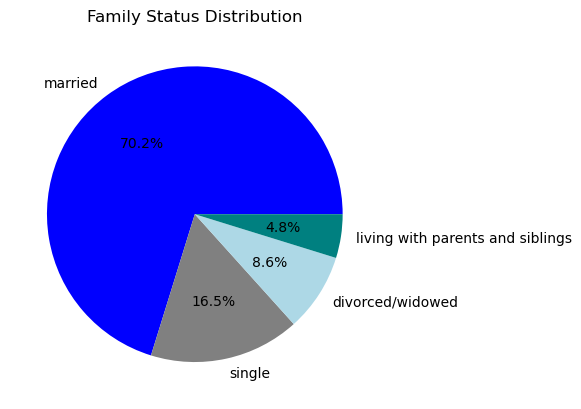

In [99]:
# Assuming df_s['fam_status'] is a categorical variable
family_status_counts = small['family_status'].value_counts()

# Plotting pie chart with percentages
pie_fam_status=plt.pie(family_status_counts, labels=family_status_counts.index, autopct='%1.1f%%', colors=['blue', 'grey', 'lightblue', 'teal'])

# Adding title
plt.title('Family Status Distribution')

# Saving pie chart to visualization folder
save_path = os.path.join(path, '04 Analysis', 'Visualizations', 'family.png')
plt.savefig(save_path)

In [100]:
# Creating chart that dispalys orders by family status and age groups
df_famstat_age = small.groupby(['family_status', 'age_group']).size().unstack()

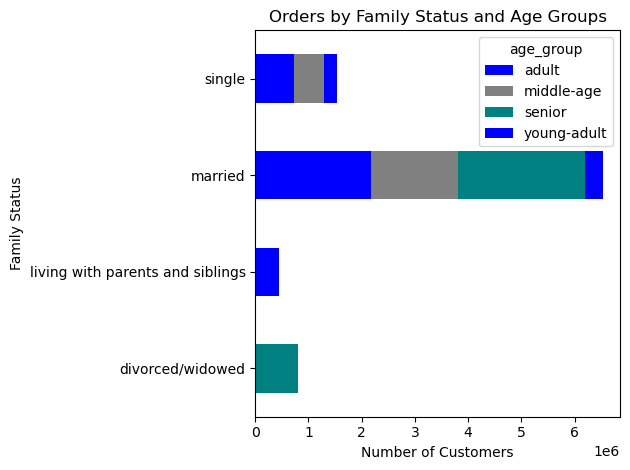

In [101]:
# Plot data using a bar chart
colors = ['blue', 'grey','teal']
bar__age = df_famstat_age.plot(kind = 'barh', stacked = True, color = colors)
plt.title('Orders by Family Status and Age Groups')
plt.xlabel('Number of Customers')
plt.ylabel('Family Status')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_famstat_age.png'), bbox_inches='tight', pad_inches=0.1)
plt.show()